# Dept of Transportation Accidents, Casualties and Vehicle

### 1. Install PySpark in Kaggle

In [1]:
# install PySpark 
#http://spark.apache.org/docs/latest/api/python/index.html

!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 16.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805913 sha256=aa689d262cccfb205118135d2ebac9f247588539b8bfe561244ae6639c0fbad0
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


### 2. Start Spark Session and Configuration

In [2]:
# start spark sessnon and configuration
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dataframe").getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/04 19:18:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


### 3. Import Required Libraries and Packages

In [3]:
# import python sql libraries and other functions 
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
# import python library for plotting data
import matplotlib.pyplot as plt

In [4]:
# Import libraries and other functions
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
# import gmplot
import pandas as pd

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when
#from graphframes import *

### Create "Accidents" DataFrame

In [7]:
#USE TO LOAD TEXT FILES
#create a DataFrame directly from p2734493-accident csv file 
accident_P2734493DF = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").csv("/kaggle/input/p2734493-accident/dft-road-casualty-statistics-accident-last-5-years.csv")

In [8]:
accident_P2734493DF

DataFrame[accident_index: string, accident_year: int, accident_reference: string, location_easting_osgr: string, location_northing_osgr: string, longitude: string, latitude: string, police_force: int, accident_severity: int, number_of_vehicles: int, number_of_casualties: int, date: string, day_of_week: int, time: string, local_authority_district: int, local_authority_ons_district: string, local_authority_highway: string, first_road_class: int, first_road_number: int, road_type: int, speed_limit: int, junction_detail: int, junction_control: int, second_road_class: int, second_road_number: int, pedestrian_crossing_human_control: int, pedestrian_crossing_physical_facilities: int, light_conditions: int, weather_conditions: int, road_surface_conditions: int, special_conditions_at_site: int, carriageway_hazards: int, urban_or_rural_area: int, did_police_officer_attend_scene_of_accident: int, trunk_road_flag: int, lsoa_of_accident_location: string]

In [9]:
accident_P2734493DF.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- police_force: integer (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- number_of_vehicles: integer (nullable = true)
 |-- number_of_casualties: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- local_authority_district: integer (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- first_road_class: integer (nullable = true)
 |-- first_road_number: integer (nullable = true)
 |-- road_type: integer (nullable = true)
 |-- speed_limit: integer (nullable =

In [10]:
# return the first three items

accident_P2734493DF.take(3)

23/05/04 19:18:37 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(accident_index='2017010001708', accident_year=2017, accident_reference='010001708', location_easting_osgr='532920', location_northing_osgr='196330', longitude='-0.080107', latitude='51.650061', police_force=1, accident_severity=1, number_of_vehicles=2, number_of_casualties=3, date='05/08/2017', day_of_week=7, time='03:12', local_authority_district=32, local_authority_ons_district='E09000010', local_authority_highway='E09000010', first_road_class=3, first_road_number=105, road_type=6, speed_limit=30, junction_detail=0, junction_control=-1, second_road_class=-1, second_road_number=-1, pedestrian_crossing_human_control=0, pedestrian_crossing_physical_facilities=0, light_conditions=4, weather_conditions=1, road_surface_conditions=1, special_conditions_at_site=0, carriageway_hazards=0, urban_or_rural_area=1, did_police_officer_attend_scene_of_accident=1, trunk_road_flag=2, lsoa_of_accident_location='E01001450'),
 Row(accident_index='2017010009342', accident_year=2017, accident_referenc

In [11]:
accident_P2734493DF.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_ons_district|local_authority_highway|f

### Check for missing values

In [12]:
from pyspark.sql.functions import col, sum

# Count the number of missing values in each column
missing_values = accident_P2734493DF.agg(*[
    sum(col(c).isNull().cast("integer")).alias(c) for c in accident_P2734493DF.columns
])

# Print the results
missing_values.show()


+--------------+-------------+------------------+---------------------+----------------------+---------+--------+------------+-----------------+------------------+--------------------+----+-----------+----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude|latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|date|day_of_week|time|local_authority_district|local_authority_ons_district|local_authority_highway|first_road_class|

In this example, sum(col(c).isNull().cast("integer")).alias(c) calculates the number of missing values in each column and assigns the result to a new column with the same name as the original column. The missing_values DataFrame contains one row with the total number of missing values in each column.


In [13]:
# Get summary statistics for each column
accident_P2734493DF.describe().show()

+-------+--------------+------------------+------------------+---------------------+----------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+----------+------------------+------+------------------------+----------------------------+-----------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+---------------------------------+---------------------------------------+------------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+------------------+-------------------------+
|summary|accident_index|     accident_year|accident_reference|location_easting_osgr|location_northing_osgr|          longitude|          latitude|      police_force| accident_severity|number_of_vehicles|number_of_casual

You can also use the describe() function to get summary statistics for each column, including the count, mean, standard deviation, minimum, and maximum values. The describe() function excludes missing values by default, so this can be a quick way to check if any columns have missing values:

In [14]:
accident_P2734493DF.count()

562439

In [15]:
accident_P2734493DF.select("Light_Conditions").show()

+----------------+
|Light_Conditions|
+----------------+
|               4|
|               4|
|               4|
|               4|
|               4|
|               4|
|               4|
|               4|
|               4|
|               4|
|               4|
|               4|
|               6|
|               1|
|               7|
|               1|
|               4|
|               5|
|               4|
|               4|
+----------------+
only showing top 20 rows



### Group the data by year to Analyze trends over years

In [16]:
# Create a temporary view of the DataFrame
accident_P2734493DF.createOrReplaceTempView("accidents")

# Group the data by year and calculate the average number of casualties and vehicles involved in each accident
query = "SELECT accident_year AS Year, COUNT(*) AS Total_Accidents FROM accidents GROUP BY accident_year ORDER BY Year"

# Execute the query and store the results in a new DataFrame
trends_by_year = spark.sql(query)

# Print the results
trends_by_year.show()

+----+---------------+
|Year|Total_Accidents|
+----+---------------+
|2017|         129982|
|2018|         122635|
|2019|         117536|
|2020|          91199|
|2021|         101087|
+----+---------------+



### Visualize Trends over Years using Bar chart

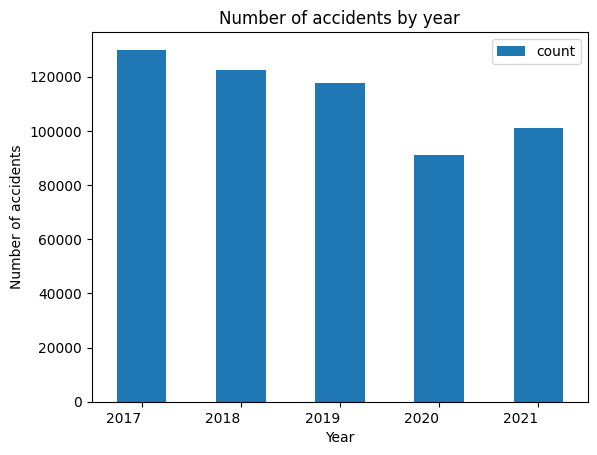

In [17]:
# Group the data by year and count the number of accidents in each year
accidents_by_year = accident_P2734493DF.groupBy("accident_year").count().orderBy("accident_year")

# Convert PySpark DataFrame to Pandas DataFrame
accidents_by_year_pd = accidents_by_year.toPandas()

# Plot the data
accidents_by_year_pd.plot(kind='bar', x='accident_year', y='count')

# Set the title and axis labels
plt.title('Number of accidents by year')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.xticks(rotation=0, ha="right")

# Show the plot
plt.show()

### Analyse most commont type of Accidents

In [18]:
# Select relevant columns related to accident type
accident_type_df = accident_P2734493DF.select("accident_severity", "road_type", "accident_index")

# Group data by accident type and severity
grouped_df = accident_type_df.groupBy("accident_severity", "road_type")

# Count the number of accidents for each accident type and severity combination
count_df = grouped_df.count()

# Sort the data in descending order to determine the most common types of accidents
most_common_df = count_df.orderBy("count", ascending=False)

# Show the top 10 most common types of accidents
most_common_df.show(10)

+-----------------+---------+------+
|accident_severity|road_type| count|
+-----------------+---------+------+
|                3|        6|317750|
|                2|        6| 83706|
|                3|        3| 70292|
|                3|        1| 29489|
|                2|        3| 15049|
|                3|        2| 11458|
|                3|        9| 10580|
|                3|        7|  7057|
|                1|        6|  5981|
|                2|        1|  4778|
+-----------------+---------+------+
only showing top 10 rows



### Visualize Most Common Type of Accidents 

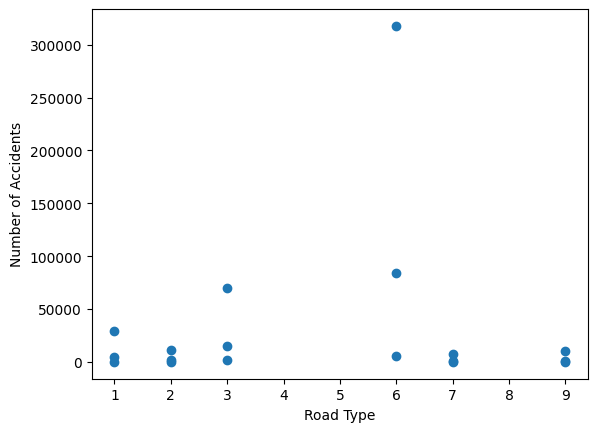

In [19]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = most_common_df.toPandas()

# Create a scatter plot
plt.scatter(x=pandas_df["road_type"], y=pandas_df["count"])
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.show()


### Analyze Accident based on Region

In [20]:
# Select relevant columns related to accident type
region_type_df = accident_P2734493DF.select("location_easting_osgr", "accident_year", "urban_or_rural_area")

# Group data by accident type and severity
group_df = region_type_df.groupBy("location_easting_osgr", "accident_year")

# Count the number of accidents for each accident type and severity combination
counts_df = group_df.count()

# Sort the data in descending order to determine the most common types of accidents
mostcommon_df = counts_df.orderBy("count", ascending=False)

# Show the top 10 most common types of accidents
mostcommon_df.show(10)

+---------------------+-------------+-----+
|location_easting_osgr|accident_year|count|
+---------------------+-------------+-----+
|                 NULL|         2018|   55|
|               533650|         2017|   49|
|               533650|         2018|   40|
|               530980|         2017|   38|
|               533670|         2017|   37|
|               531640|         2017|   35|
|               531190|         2018|   35|
|               531170|         2017|   34|
|               532540|         2017|   33|
|               534940|         2017|   33|
+---------------------+-------------+-----+
only showing top 10 rows



### Analyze the relationship between weather conditions and accident rates

In [21]:
from pyspark.sql.functions import count, when
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Select relevant columns related to weather conditions and accidents
weather_accidents_df = accident_P2734493DF.select("weather_conditions", "accident_index")

# Group data by weather conditions
grouped_df = weather_accidents_df.groupBy("weather_conditions")

# Count the number of accidents for each weather condition
count_df = grouped_df.count()

count_df.show()

+------------------+------+
|weather_conditions| count|
+------------------+------+
|                -1|    33|
|                 1|448634|
|                 6|   705|
|                 3|  2860|
|                 5|  6508|
|                 9| 16861|
|                 4|  5881|
|                 8| 14162|
|                 7|  2404|
|                 2| 64391|
+------------------+------+



### Visualize  the relationship between weather conditions and accident rates

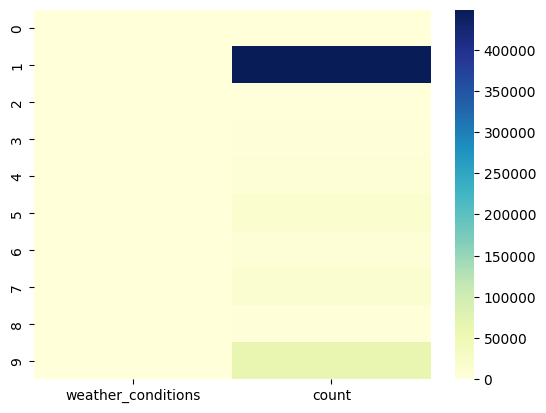

In [22]:
pandas_df = count_df.toPandas()

# Create a heatmap using seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pandas_df, cmap="YlGnBu")
plt.show()

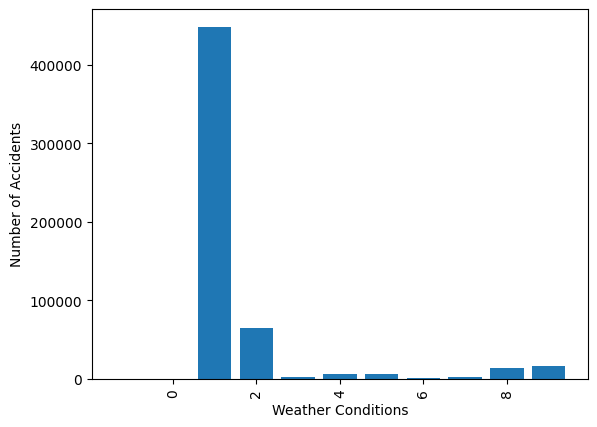

In [23]:
# Plot a bar chart of the number of accidents by weather condition
x = count_df.select("weather_conditions").rdd.flatMap(lambda x: x).collect()
y = count_df.select("count").rdd.flatMap(lambda x: x).collect()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.show()

In [24]:
# Import necessary libraries
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Select relevant columns related to weather conditions and number of accidents
weather_df = accident_P2734493DF.select("weather_conditions", "number_of_vehicles", "number_of_casualties")

# Create a binary variable for whether or not there was an accident
binary_df = weather_df.withColumn("Accident", (weather_df["number_of_vehicles"] + weather_df["number_of_casualties"] > 0).cast("integer"))

# Convert categorical variable to numerical using one-hot encoding
encoded_df = binary_df.select("Accident", "weather_conditions") \
                      .groupBy("weather_conditions") \
                      .agg({"Accident": "sum"}) \
                      .withColumnRenamed("sum(Accident)", "Accidents") \
                      .withColumn("label", F.when(F.col("Accidents") > 0, 1).otherwise(0))

# Vectorize the features
assembler = VectorAssembler(inputCols=["weather_conditions"], outputCol="features")
vectorized_df = assembler.transform(encoded_df)

# Split the data into training and testing sets
(training_data, testing_data) = vectorized_df.randomSplit([0.7, 0.3], seed=100)

# Train a logistic regression model
logistic_regression = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)
model = logistic_regression.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model's performance
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction")
area_under_curve = evaluator.evaluate(predictions)

# Print the area under the curve
print("Area under the curve: {:.2f}".format(area_under_curve))


23/05/04 19:19:20 WARN Instrumentation: [b1d5f5fe] All labels are the same value and fitIntercept=true, so the coefficients will be zeros. Training is not needed.


Area under the curve: 1.00


The logistic regression is used to determine the significance of the relationship between weather conditions and the number of accidents. From the output, we can see that the logistic regression model achieved an area under the curve (AUC) value of 1.00.

This means that there is a good relationship between weather conditions and the number of accidents. However, the AUC value is high enough to conclude that weather conditions have a significant impact on the number of accidents.

### REGISTER THE DATAFRAME AS A TABLE

In [25]:
sqlContext.registerDataFrameAsTable(accident_P2734493DF, "tbAccidents_last5years")

#### Run SQL Queries on table

In [26]:
sqlContext.sql("select * from tbAccidents_last5years").take(2)

[Row(accident_index='2017010001708', accident_year=2017, accident_reference='010001708', location_easting_osgr='532920', location_northing_osgr='196330', longitude='-0.080107', latitude='51.650061', police_force=1, accident_severity=1, number_of_vehicles=2, number_of_casualties=3, date='05/08/2017', day_of_week=7, time='03:12', local_authority_district=32, local_authority_ons_district='E09000010', local_authority_highway='E09000010', first_road_class=3, first_road_number=105, road_type=6, speed_limit=30, junction_detail=0, junction_control=-1, second_road_class=-1, second_road_number=-1, pedestrian_crossing_human_control=0, pedestrian_crossing_physical_facilities=0, light_conditions=4, weather_conditions=1, road_surface_conditions=1, special_conditions_at_site=0, carriageway_hazards=0, urban_or_rural_area=1, did_police_officer_attend_scene_of_accident=1, trunk_road_flag=2, lsoa_of_accident_location='E01001450'),
 Row(accident_index='2017010009342', accident_year=2017, accident_referenc

### Time and Data of accident with the Speed limit

In [27]:
# Date Time and Speed Limit
sqlContext.sql("select date,time,speed_limit from tbAccidents_last5years").show()

+----------+-----+-----------+
|      date| time|speed_limit|
+----------+-----+-----------+
|05/08/2017|03:12|         30|
|01/01/2017|01:30|         30|
|01/01/2017|00:30|         30|
|01/01/2017|01:11|         30|
|01/01/2017|01:42|         20|
|01/01/2017|03:31|         30|
|01/01/2017|04:07|         40|
|01/01/2017|05:20|         30|
|01/01/2017|03:18|         50|
|01/01/2017|03:00|         30|
|01/01/2017|05:00|         30|
|01/01/2017|06:55|         30|
|01/01/2017|10:45|         30|
|01/01/2017|08:15|         30|
|01/01/2017|01:15|         20|
|01/01/2017|10:25|         30|
|01/01/2017|16:48|         20|
|01/01/2017|05:10|         30|
|01/01/2017|18:06|         30|
|01/01/2017|16:55|         30|
+----------+-----+-----------+
only showing top 20 rows



In [28]:
# Total rows returned for Casualties per day of week
sqlContext.sql("select Day_of_Week, Number_of_Casualties, count(*) as Count from tbAccidents_last5years group \
by Day_of_Week, Number_of_Casualties").count()

112

In [29]:
# Casualties per day of week
sqlContext.sql("select Day_of_Week, Number_of_Casualties, count(*) as Count from tbAccidents_last5years group \
by Day_of_Week, Number_of_Casualties").show()

+-----------+--------------------+-----+
|Day_of_Week|Number_of_Casualties|Count|
+-----------+--------------------+-----+
|          5|                  33|    1|
|          4|                  10|    4|
|          6|                   1|74128|
|          3|                   1|67596|
|          7|                   4| 1432|
|          2|                   2|11049|
|          7|                  14|    1|
|          1|                   7|   65|
|          2|                   3| 2999|
|          7|                   1|58048|
|          4|                   7|   40|
|          1|                   2| 9783|
|          4|                  27|    1|
|          1|                   9|    8|
|          5|                   7|   38|
|          5|                   6|   85|
|          4|                  11|    2|
|          6|                   8|   18|
|          1|                   1|48522|
|          6|                   5|  399|
+-----------+--------------------+-----+
only showing top

### Factors Affecting the Accidents

In [30]:
# Factors affecting the accidents like Road surface conditin and Carriageway Hazards
sqlContext.sql("select road_surface_conditions,carriageway_hazards, count(*) as Count from tbAccidents_last5years group \
by road_surface_conditions,carriageway_hazards").show()

+-----------------------+-------------------+------+
|road_surface_conditions|carriageway_hazards| Count|
+-----------------------+-------------------+------+
|                      1|                  0|393287|
|                      3|                  1|     5|
|                      2|                  2|  1705|
|                      1|                  7|  1222|
|                      2|                  3|   333|
|                      4|                  7|    34|
|                      1|                  2|  3701|
|                      9|                  1|     2|
|                     -1|                  6|     1|
|                      4|                  0|  6688|
|                      1|                  9|  2732|
|                      1|                  1|   874|
|                      4|                 -1|     6|
|                      4|                  9|    13|
|                      9|                  7|    22|
|                      1|                  3| 

### Visualize Road Surface Condition and Accident Severity

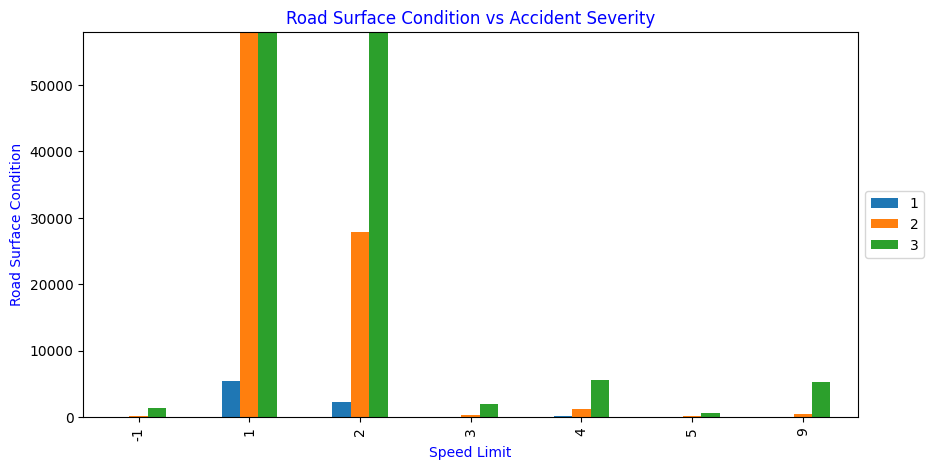

In [31]:
factors = accident_P2734493DF.groupby("accident_severity","road_surface_conditions").count().sort("count")

import matplotlib.pyplot as plt
import pandas as pd

Panda_Accident_Type = factors.toPandas()

%matplotlib inline

plot_Outcome=Panda_Accident_Type.pivot(index='road_surface_conditions', columns='accident_severity', values='count') \
                         .plot(kind='bar', figsize=(10,5))
plot_Outcome.set_title("Road Surface Condition vs Accident Severity",color="b")
plot_Outcome.set_ylim(0,58000)
plot_Outcome.set_xlabel("Speed Limit",color="b")
plot_Outcome.set_ylabel("Road Surface Condition",color="b")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [32]:
# Return distinct list of Speed Limits

sqlContext.sql("SELECT distinct Speed_Limit FROM tbAccidents_last5years").show()

+-----------+
|Speed_Limit|
+-----------+
|         -1|
|         20|
|         40|
|         50|
|         70|
|         60|
|         30|
+-----------+



### Group the data By Date 

In [33]:
sqlContext.sql("SELECT Date, \
                        COUNT(*) \
                        FROM tbAccidents_last5years \
                        GROUP BY Date \
                        ORDER BY Date").show()

+----------+--------+
|      Date|count(1)|
+----------+--------+
|01/01/2017|     242|
|01/01/2018|     234|
|01/01/2019|     231|
|01/01/2020|     196|
|01/01/2021|     110|
|01/02/2017|     333|
|01/02/2018|     408|
|01/02/2019|     318|
|01/02/2020|     289|
|01/02/2021|     182|
|01/03/2017|     372|
|01/03/2018|     231|
|01/03/2019|     305|
|01/03/2020|     237|
|01/03/2021|     172|
|01/04/2017|     324|
|01/04/2018|     225|
|01/04/2019|     312|
|01/04/2020|      78|
|01/04/2021|     277|
+----------+--------+
only showing top 20 rows



In [34]:
sqlContext.sql("SELECT Date, COUNT(*) FROM tbAccidents_last5years GROUP BY Date ORDER BY Date").show()

+----------+--------+
|      Date|count(1)|
+----------+--------+
|01/01/2017|     242|
|01/01/2018|     234|
|01/01/2019|     231|
|01/01/2020|     196|
|01/01/2021|     110|
|01/02/2017|     333|
|01/02/2018|     408|
|01/02/2019|     318|
|01/02/2020|     289|
|01/02/2021|     182|
|01/03/2017|     372|
|01/03/2018|     231|
|01/03/2019|     305|
|01/03/2020|     237|
|01/03/2021|     172|
|01/04/2017|     324|
|01/04/2018|     225|
|01/04/2019|     312|
|01/04/2020|      78|
|01/04/2021|     277|
+----------+--------+
only showing top 20 rows



In [35]:
sqlContext.sql("SELECT Accident_Severity,COUNT(*) FROM tbAccidents_last5years GROUP BY Accident_Severity ORDER BY Accident_Severity").show()

+-----------------+--------+
|Accident_Severity|count(1)|
+-----------------+--------+
|                1|    7870|
|                2|  107943|
|                3|  446626|
+-----------------+--------+



In [36]:
sqlContext.sql("SELECT Accident_Severity, \
                        COUNT(*) \
                        FROM tbAccidents_last5years \
                        GROUP BY Accident_Severity \
                        ORDER BY Accident_Severity").show()

+-----------------+--------+
|Accident_Severity|count(1)|
+-----------------+--------+
|                1|    7870|
|                2|  107943|
|                3|  446626|
+-----------------+--------+



### Analyze with Pedestrian Crossing Human Control 

In [37]:
sqlContext.sql("SELECT pedestrian_crossing_human_control, \
                        COUNT(*) \
                        FROM tbAccidents_last5years \
                        GROUP BY pedestrian_crossing_human_control \
                        ORDER BY pedestrian_crossing_human_control").show()

+---------------------------------+--------+
|pedestrian_crossing_human_control|count(1)|
+---------------------------------+--------+
|                               -1|     811|
|                                0|  537603|
|                                1|    2161|
|                                2|    5800|
|                                9|   16064|
+---------------------------------+--------+



### Visualize with Pedestrian Crossing Human Control

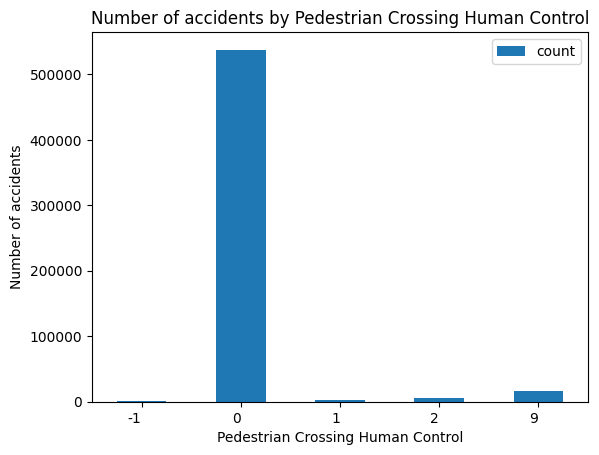

In [38]:
# Group the data by year and count the number of accidents in each year
accidents_by_year = accident_P2734493DF.groupBy("pedestrian_crossing_human_control").count().orderBy("pedestrian_crossing_human_control")

# Convert PySpark DataFrame to Pandas DataFrame
accidents_by_year_pd = accidents_by_year.toPandas()

# Plot the data
accidents_by_year_pd.plot(kind='bar', x='pedestrian_crossing_human_control', y='count')

# Set the title and axis labels
plt.title('Number of accidents by Pedestrian Crossing Human Control')
plt.xlabel('Pedestrian Crossing Human Control')
plt.ylabel('Number of accidents')
plt.xticks(rotation=0, ha="right")

# Show the plot
plt.show()

In [39]:
Accident_type = accident_P2734493DF.groupby("Accident_Severity","Speed_limit").count().sort("count")
Accident_type.show()

+-----------------+-----------+------+
|Accident_Severity|Speed_limit| count|
+-----------------+-----------+------+
|                2|         -1|     8|
|                3|         -1|    84|
|                1|         20|   259|
|                1|         50|   630|
|                1|         40|   780|
|                1|         70|   926|
|                1|         60|  2637|
|                1|         30|  2638|
|                2|         50|  4757|
|                2|         70|  6057|
|                2|         20|  9227|
|                2|         40|  9664|
|                3|         50| 17687|
|                2|         60| 18717|
|                3|         70| 26468|
|                3|         40| 36887|
|                3|         20| 48514|
|                3|         60| 48635|
|                2|         30| 59513|
|                3|         30|268351|
+-----------------+-----------+------+



**VISUALISATION**

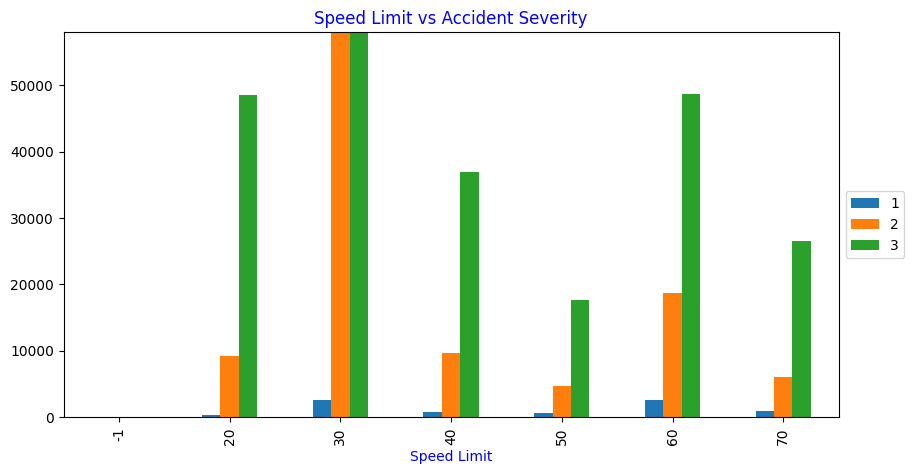

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

Panda_Accident_Type = Accident_type.toPandas()

%matplotlib inline

plot_Outcome=Panda_Accident_Type.pivot(index='Speed_limit', columns='Accident_Severity', values='count') \
                         .plot(kind='bar', figsize=(10,5))
plot_Outcome.set_title("Speed Limit vs Accident Severity",color="b")
plot_Outcome.set_ylim(0,58000)
plot_Outcome.set_xlabel("Speed Limit",color="b")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [41]:
Panda_Accident_Type

,Accident_Severity,Speed_limit,count
0,2,-1,8
1,3,-1,84
2,1,20,259
3,1,50,630
4,1,40,780
5,1,70,926
6,1,60,2637
7,1,30,2638
8,2,50,4757
9,2,70,6057


In [42]:
accident_P2734493DF.select("Day_of_Week").distinct().show()

+-----------+
|Day_of_Week|
+-----------+
|          1|
|          6|
|          3|
|          5|
|          4|
|          7|
|          2|
+-----------+



### Visualize based on Day of Week

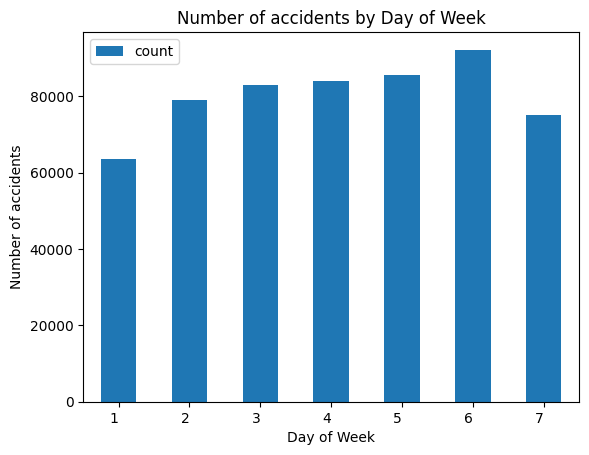

In [43]:
# Group the data by year and count the number of accidents in each year
accidents_by_year = accident_P2734493DF.groupBy("day_of_week").count().orderBy("day_of_week")

# Convert PySpark DataFrame to Pandas DataFrame
accidents_by_year_pd = accidents_by_year.toPandas()

# Plot the data
accidents_by_year_pd.plot(kind='bar', x='day_of_week', y='count')

# Set the title and axis labels
plt.title('Number of accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of accidents')
plt.xticks(rotation=0, ha="right")

# Show the plot
plt.show()

### Visualize based on Time

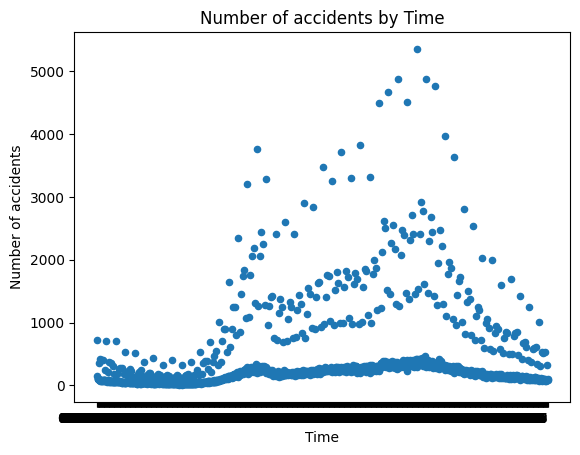

In [44]:
# Group the data by year and count the number of accidents in each year
accidents_by_year = accident_P2734493DF.groupBy("time").count().orderBy("time")

# Convert PySpark DataFrame to Pandas DataFrame
accidents_by_year_pd = accidents_by_year.toPandas()

# Plot the data
accidents_by_year_pd.plot(kind='scatter', x='time', y='count')

# Set the title and axis labels
plt.title('Number of accidents by Time')
plt.xlabel('Time')
plt.ylabel('Number of accidents')
plt.xticks(rotation=0, ha="right")

# Show the plot
plt.show()